# Plotting Sea Level Pressure and Winds for March 2013 

Get the data from atmospheric forcing , i.e. ERA5 or WARF

- Was the atmospheric conditions in March 2013 anomalous compared to previous years? Compare with climatology

In [1]:
%matplotlib notebook

import numpy as np
import datetime

import os 
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar


from netCDF4 import Dataset, num2date
from pynextsim.netcdf_list import NetcdfList
import xarray as xr


In [ ]:

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + datetime.timedelta(n)

# datetime(year, month, day, hour, minute, second) 
start_dt = datetime.datetime(2013, 2, 1, 0, 0, 0) 
end_dt = datetime.datetime(2013, 3, 20, 0, 0, 0) 

for dt in daterange(start_dt, end_dt):
    print(dt.strftime("%Y-%m-%d"))
    
# datetime(year, month, day, hour, minute, second) 
a = datetime.datetime(2013, 1, 1, 0, 0, 0) 
b = datetime.datetime(2013, 3, 1, 0, 0, 0) 
  
# returns a timedelta object 
c = a-b  
print('Difference: ', c.days) 

daysinhours = c.days*24
print(daysinhours)
# returns (minutes, seconds) 
#hours = divmod(c.hours, 24)  
#print('Difference in minutes: ', hours[0], 'minutes', 
#                                 hours[1], 'seconds') 


In [2]:
path_in = "/cluster/projects/nn9624k/rheinlender/ERA5"


print(path_in)

ds = xr.open_dataset(path_in + '/ERA5_msl_y2013_daily.nc')   # sea level pressure for 2013

# convert units
with xr.set_options(keep_attrs=True):
    ds['msl'] = ds.msl / 100 
    ds.msl.attrs['units'] = 'hPa'

lat = ds.latitude.values
lon = ds.longitude.values

lat_min = min(lat)
lat_max = max(lat)
lon_min = min(lon)
lon_max = max(lon)

print(lon_min, lon_max, lat_min, lat_max)

# select time-slice 
subset = ds.sel(time=slice('2013-01-20', '2013-03-16'))

date=subset['time']
date


/cluster/projects/nn9624k/rheinlender/ERA5
0.0 359.75 57.0 90.0


<xarray.DataArray 'time' (time: 56)>
array(['2013-01-20T12:00:00.000000000', '2013-01-21T12:00:00.000000000',
       '2013-01-22T12:00:00.000000000', '2013-01-23T12:00:00.000000000',
       '2013-01-24T12:00:00.000000000', '2013-01-25T12:00:00.000000000',
       '2013-01-26T12:00:00.000000000', '2013-01-27T12:00:00.000000000',
       '2013-01-28T12:00:00.000000000', '2013-01-29T12:00:00.000000000',
       '2013-01-30T12:00:00.000000000', '2013-01-31T12:00:00.000000000',
       '2013-02-01T12:00:00.000000000', '2013-02-02T12:00:00.000000000',
       '2013-02-03T12:00:00.000000000', '2013-02-04T12:00:00.000000000',
       '2013-02-05T12:00:00.000000000', '2013-02-06T12:00:00.000000000',
       '2013-02-07T12:00:00.000000000', '2013-02-08T12:00:00.000000000',
       '2013-02-09T12:00:00.000000000', '2013-02-10T12:00:00.000000000',
       '2013-02-11T12:00:00.000000000', '2013-02-12T12:00:00.000000000',
       '2013-02-13T12:00:00.000000000', '2013-02-14T12:00:00.000000000',
       '2013-02-15T12:00:00.000000000', '2013-02-16T12:00:00.000000000',
       '2013-02-17T12:00:00.000000000', '2013-02-18T12:00:00.000000000',
       '2013-02-19T12:00:00.000000000', '2013-02-20T12:00:00.000000000',
       '2013-02-21T12:00:00.000000000', '2013-02-22T12:00:00.000000000',
       '2013-02-23T12:00:00.000000000', '2013-02-24T12:00:00.000000000',
       '2013-02-25T12:00:00.000000000', '2013-02-26T12:00:00.000000000',
       '2013-02-27T12:00:00.000000000', '2013-02-28T12:00:00.000000000',
       '2013-03-01T12:00:00.000000000', '2013-03-02T12:00:00.000000000',
       '2013-03-03T12:00:00.000000000', '2013-03-04T12:00:00.000000000',
       '2013-03-05T12:00:00.000000000', '2013-03-06T12:00:00.000000000',
       '2013-03-07T12:00:00.000000000', '2013-03-08T12:00:00.000000000',
       '2013-03-09T12:00:00.000000000', '2013-03-10T12:00:00.000000000',
       '2013-03-11T12:00:00.000000000', '2013-03-12T12:00:00.000000000',
       '2013-03-13T12:00:00.000000000', '2013-03-14T12:00:00.000000000',
       '2013-03-15T12:00:00.000000000', '2013-03-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-20T12:00:00 ... 2013-03-16T12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T
    cell_methods:   time: mean

[ 980.  982.  984.  986.  988.  990.  992.  994.  996.  998. 1000. 1002.
 1004. 1006. 1008. 1010. 1012. 1014. 1016. 1018. 1020. 1022. 1024. 1026.
 1028. 1030. 1032. 1034. 1036. 1038. 1040. 1042. 1044. 1046. 1048.]


<IPython.core.display.Javascript object>


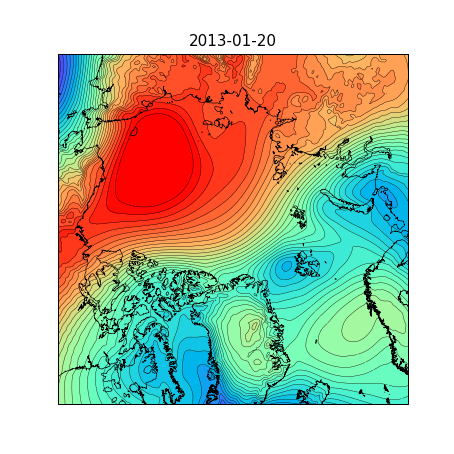

In [7]:
import cartopy.crs as ccrs
import cartopy

#plt.ioff()

outpath_plots = 'plots/era5/'

plt.close('all')

# get bounding box from input data
extent = [0, 180, lat_min, lat_max]

# make discrete colormap
bounds=np.linspace(940,1060,100)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# contour levels
clevs = np.arange(980,1050.,2.)
print(clevs)

#for i in range(0,len(subset.msl)):
for i in range(0,1):

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection = ccrs.NorthPolarStereo(central_longitude=-45))
    ax.coastlines(resolution='10m', linewidth=0.5)
    ax.set_extent(extent)
    ax.axes.set_aspect('equal')
    
    cf = ax.contourf(lon, lat, subset.msl[i,:,:],clevs,
                     cmap=plt.cm.rainbow, 
                     add_colorbar=False, 
                     transform=ccrs.PlateCarree(), 
                     extend='both'
                    )
    # Add contours
    ax.contour(lon, lat, subset.msl[i,:,:],clevs, colors="black", transform=ccrs.PlateCarree(), linewidths=0.3) 
    
    title = str(date[i].values)[:10]
    ax.set_title(title)
    
    # add colorbar
   # cb = matplotlib.colorbar.ColorbarBase(cf,orientation='horizontal')
   #cb.ax.set_title('mslp [hPa]');
    
    #fig.savefig(outpath_plots+'ERA5_SLP_'+ str(date[i].values)[:10]+'.png',bbox_inches='tight')
  #  plt.clf()
    
plt.ion()
    

In [14]:
ext=ax.get_extent()
print(ext)

(-2677938.019514385, 2677938.0195143847, -2677938.019514385, 2677938.0195143847)


In [10]:
# Plot surface wind speed 

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point 

path_in = "/cluster/projects/nn9624k/rheinlender/ERA5"
print(path_in)

u = xr.open_dataset(path_in + '/ERA5_u10_y2013_daily.nc')   # uvel for 2013
v = xr.open_dataset(path_in + '/ERA5_v10_y2013_daily.nc')   # vvel for 2013

lon = u.longitude
lat = u.latitude

# select time-slice 
usel = u.sel(time=slice('2013-02-16', '2013-03-20'))
vsel = v.sel(time=slice('2013-02-16', '2013-03-20'))

# calculate wind speed 
wind_speed = np.sqrt(usel['u10']*usel['u10'] + vsel['v10']*vsel['v10'])

/cluster/projects/nn9624k/rheinlender/ERA5


In [12]:
# Plot wind speed

outpath_plots = 'plots/era5/'

# create axis with subplot a project
crs_proj = ccrs.NorthPolarStereo(central_longitude=-45)

# set extent
extent = [0, 180, 57, 90]

#plt.ioff()

#for i in range(0,len(wind_speed)):
for i in range(0,1):

    plt.close('all')
    fig = plt.figure(figsize=(5, 5))
    ax = plt.subplot(projection=crs_proj, extent=extent)

    #ax = fig.add_subplot(1, 1, 1, projection=crs_proj)
    #ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines('10m')

    # plot wind speed
    cf = ax.contourf(lon, lat, wind_speed[i,:,:], 
                     levels=np.arange(0., 22., 1.),
                     cmap='RdYlBu_r',
                     extend='max',
                     transform=ccrs.PlateCarree()
                    )

    # plot velocity field
    uvel, lonu = add_cyclic_point(usel.u10, coord=u.longitude)
    vvel, lonv = add_cyclic_point(vsel.v10, coord=v.longitude)

    lonu = np.where(lonu>=180.,lonu-360.,lonu)

    sp = ax.streamplot(lonu, lat, uvel[i], vvel[i],
                       linewidth=0.2,
                       arrowsize = 0.2,
                       density=5,
                       color='k',
                       transform=ccrs.PlateCarree())

    # add colorbar
    cb = plt.colorbar(cf,orientation='horizontal', pad=0.07, aspect=50, fraction=0.1)
    cb.ax.set_title('Wind Speed [m/s]');

    
    # add title
    title = str(wind_speed.time[i].values)[:10]
    ax.set_title(title)
    
    # save figure
    fig.savefig(outpath_plots+'ERA5_WindSpeed_'+ str(wind_speed.time[i].values)[:10]+'.png',bbox_inches='tight')

plt.ion()

In [35]:
# Plot winds

outpath_plots = 'plots/era5/'

# create axis with subplot a project
crs_proj = ccrs.NorthPolarStereo(central_longitude=-45)

# set extent
extent = [0, 180, 57, 90]

#plt.ioff()

#for i in range(0,len(wind_speed)):
for i in range(0,1):

    plt.close('all')
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(projection=crs_proj)
    ax.set_extent([0, 180, 57, 90], crs=ccrs.PlateCarree()) 
    ax.coastlines('10m')

    # plot zonal winds
    sp = ax.contourf(lon, lat, usel.u10[i],
                       #linewidth=0.4,
                       #arrowsize = 0.5,
                       #density=3,
                       #color='k',
                       transform=ccrs.PlateCarree()) # use the data crs
    
    q = ax.quiver(lon, lat, usel.u10[i], vsel.v10[i], transform=ccrs.PlateCarree())
    
    plt.show()


<IPython.core.display.Javascript object>

IndexError: 2-dimensional boolean indexing is not supported. 

<IPython.core.display.Javascript object>


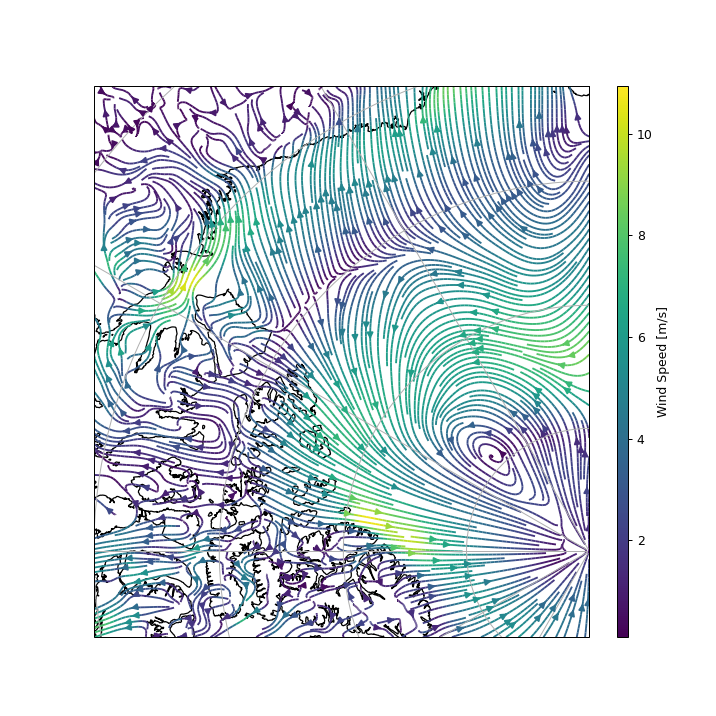

/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/cartopy/vector_transform.py:140: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = target_proj.transform_vectors(src_crs, x, y, u, v)


In [72]:
plt.close('all')

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
ax.set_extent([-160, -80, 70, 90], crs=ccrs.PlateCarree()) 
ax.coastlines('10m')

gridlines = ax.gridlines(draw_labels=False)

lon2D, lat2D = np.meshgrid(lon, lat) 

u10=usel.u10[0,:,:].values
v10=vsel.v10[0,:,:].values

magnitude = (u10 ** 2 + v10 ** 2) ** 0.5
sp=ax.streamplot(lon, lat, u10, v10, transform=ccrs.PlateCarree(),
                  linewidth=1.5, density=4, color=magnitude)
fig.colorbar(sp.lines, pad=0.05, aspect=50, fraction=0.05, label='Wind Speed [m/s]')
plt.show()


In [58]:
# Animation
    
plt.ion()
plt.close('all')

import matplotlib.animation as animation
from IPython.display import HTML, Image
import cartopy.crs as ccrs

outpath_plots = '/cluster/work/users/rheinlender/plots/'

# set extent
extent = [0, 180, 44, 90]

def make_figure():
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection = ccrs.NorthPolarStereo(central_longitude=-45))
    ax.coastlines(resolution='10m', linewidth=0.5)
    ax.set_extent(extent) 

    return fig, ax

fig, ax = make_figure();

frames = len(date)        # Number of frames
#frames = 3       # Number of frames
print(frames)

# contour levels
clevs = np.arange(960,1060.,2.)

def draw(frame):
    cf = ax.contourf(lon, lat, subset.msl[frame,:,:],clevs,
                     cmap=plt.cm.rainbow, 
                     #add_colorbar=False, 
                     transform=ccrs.PlateCarree(), 
                     extend='both')

    # Add contours
    c=ax.contour(lon, lat, subset.msl[frame,:,:],clevs, 
                 colors="black", 
                 transform=ccrs.PlateCarree(), 
                 linewidths=0.3, 
                 add_colorbar=False) 
    
    # set title
    title = str(date[frame].values)[:10]
    ax.set_title(title)
    return cf

def init():
    add_colorbar(fig, ax, cf)
    return draw(0) 

def add_colorbar(fig, ax, cf):
    return fig.colorbar(cf, ax=ax, orientation='horizontal', label='mslp [hPa]', pad=0.07, aspect=50, fraction=0.1)
    
def animate(frame):
    #ax.clear()
    ax.collections = []    # gets rid of existing contours before plotting new ones
    return draw(frame)
    
ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,
                              init_func=init, repeat=False)

ani.save(outpath_plots+'ERA5_SLP_2013-Jan-20_2013-Mar-16.gif' , writer='imagemagic', fps=2);

plt.close(fig)


<IPython.core.display.Javascript object>

MovieWriter imagemagic unavailable; using Pillow instead.


56


/cluster/home/rheinlender/packages/miniconda3/envs/pynextsim/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


In [50]:
animate(0)

In [ ]:
%matplotlib notebook

import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

import os 
import sys
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors


inpath = '/cluster/projects/nn2993k/sim/data/ERA5/'
outpath_plots = '/cluster/work/users/rheinlender/plots/'

fl = inpath+'ERA5_msl_y2013.nc'

# Open multiple nc files
with xr.open_dataset('/cluster/projects/nn2993k/sim/data/ERA5/ERA5_msl_y2013.nc') as ds:
    
    # Select data in Jan-Mar
    subset = ds.sel(time=slice('2013-01-01', '2013-01-02'))

subset    


# Select data in Jan-Mar
#subset = ds.sel(time=slice('2013-01-01', '2013-03-31'))


In [ ]:
subset